<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [5]:
import pandas as pd

# Load the dataset from the local file
df = pd.read_csv(file_path)

# Identify duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

# Display the first few duplicate rows to understand their structure
print("First few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows in the dataset: 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, Offic

##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
## Write your code here
# Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Verify the removal by counting the number of duplicate rows after removal
num_duplicates_after_removal = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after_removal}")

Number of duplicate rows after removal: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [7]:
## Write your code here
# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for all columns:")
print(missing_values)

Missing values for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [8]:
## Write your code here
# Count the number of missing rows for the 'RemoteWork' column
missing_RemoteWork = df['RemoteWork'].isnull().sum()
print(f"Number of missing rows in the 'RemoteWork' column: {missing_RemoteWork}")

Number of missing rows in the 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [9]:
## Write your code here
# Find the value counts for the 'RemoteWork' column
remote_work_counts = df['RemoteWork'].value_counts()
print("Value counts for the 'RemoteWork' column:")
print(remote_work_counts)

Value counts for the 'RemoteWork' column:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [10]:
## Write your code here
# Identify the most frequent value in the 'RemoteWork' column
most_frequent_value = df['RemoteWork'].mode()[0]
print(f"The most frequent value in the 'RemoteWork' column is: {most_frequent_value}")

The most frequent value in the 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [11]:
## Write your code here
# Identify the most frequent value in the 'RemoteWork' column
most_frequent_value = df['RemoteWork'].mode()[0]

# Impute missing values in the 'RemoteWork' column with the most frequent value
df['RemoteWork'].fillna(most_frequent_value, inplace=True)

# Verify the imputation
missing_values_after_imputation = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork' column after imputation: {missing_values_after_imputation}")

Missing values in 'RemoteWork' column after imputation: 0


/tmp/ipykernel_1016/342066455.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_value, inplace=True)


##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']

Summary statistics for CompTotal:
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


ValueError: Maximum allowed size exceeded

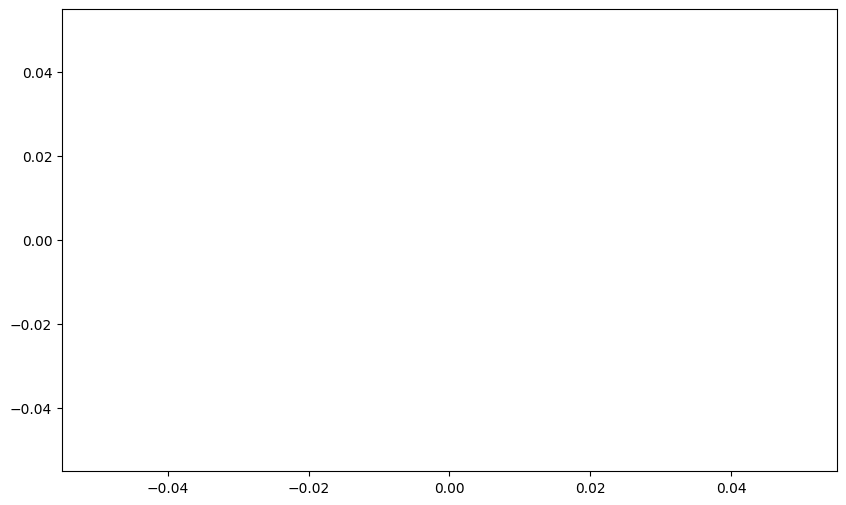

In [13]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the local file
df = pd.read_csv('path_to_your_local_file/survey-data.csv')

# Check for compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col]
print("Compensation-related columns:")
print(compensation_columns)

# Describe the distribution of each compensation-related column
for col in compensation_columns:
    print(f"\nSummary statistics for {col}:")
    print(df[col].describe())

    # Visualize the distribution with a limited range
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xlim(0, df[col].quantile(0.95))  # Limit the range to the 95th percentile
    plt.show()


### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
